In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Cleaning

In [17]:
df = pd.read_csv('../final_datasetBSL.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={42: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
3,0.503749,0.750119,-6.770000e-07,0.389167,0.670613,-0.084230,0.329903,0.553373,-0.145092,0.409233,...,0.855140,0.507133,-0.184079,0.796939,0.562214,-0.166877,0.731328,0.595657,-0.13974624872207642],1
4,0.444042,0.705644,-6.390000e-07,0.357433,0.604926,-0.046315,0.335348,0.507655,-0.072823,0.431247,...,0.753222,0.487060,-0.093008,0.696466,0.534845,-0.068607,0.652367,0.562143,-0.044197287410497665],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,5
9753,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,5
9754,0.358673,0.781023,-6.600000e-08,0.238137,0.713152,-0.039971,0.157433,0.605899,-0.050890,0.099828,...,0.623149,0.494585,-0.072875,0.654614,0.443554,-0.073721,0.681122,0.396588,-0.07561323046684265],5
9755,0.402736,0.740536,6.310000e-07,0.302300,0.691142,-0.061710,0.237727,0.613321,-0.100977,0.187513,...,0.685845,0.545336,-0.157044,0.738722,0.509929,-0.178002,0.782274,0.475871,-0.19224554300308228],5


In [18]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (9757, 64)


In [19]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 5410


In [20]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
3,0.503749,0.750119,-6.770000e-07,0.389167,0.670613,-0.084230,0.329903,0.553373,-0.145092,0.409233,...,0.855140,0.507133,-0.184079,0.796939,0.562214,-0.166877,0.731328,0.595657,-0.13974624872207642],1
4,0.444042,0.705644,-6.390000e-07,0.357433,0.604926,-0.046315,0.335348,0.507655,-0.072823,0.431247,...,0.753222,0.487060,-0.093008,0.696466,0.534845,-0.068607,0.652367,0.562143,-0.044197287410497665],1
5,0.492974,0.867944,-4.370000e-07,0.381305,0.803903,-0.057753,0.328445,0.691551,-0.077181,0.414042,...,0.642642,0.605035,-0.101114,0.607647,0.662273,-0.094596,0.578731,0.681397,-0.08255821466445923],1
8,0.483482,0.943150,1.280000e-07,0.404109,0.838192,-0.098903,0.404909,0.679281,-0.142251,0.528050,...,0.851585,0.596945,-0.141401,0.797331,0.658915,-0.123175,0.747692,0.685885,-0.08817092329263687],1
11,0.377854,0.894570,-1.180000e-06,0.278479,0.718604,-0.035467,0.267706,0.597904,-0.054504,0.388219,...,0.786022,0.563083,-0.064081,0.693981,0.591330,-0.034705,0.618633,0.640284,-0.008541233837604523],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9750,0.484950,0.637998,6.240000e-07,0.389378,0.583516,-0.060032,0.318816,0.511493,-0.102343,0.265470,...,0.752964,0.435537,-0.173036,0.809386,0.399208,-0.198361,0.856131,0.363884,-0.21516163647174835],5
9751,0.327939,0.788385,7.540000e-08,0.215016,0.737532,-0.050332,0.139533,0.664330,-0.075432,0.106917,...,0.572459,0.559384,-0.087153,0.615960,0.521074,-0.094061,0.653388,0.483254,-0.09915492683649063],5
9754,0.358673,0.781023,-6.600000e-08,0.238137,0.713152,-0.039971,0.157433,0.605899,-0.050890,0.099828,...,0.623149,0.494585,-0.072875,0.654614,0.443554,-0.073721,0.681122,0.396588,-0.07561323046684265],5
9755,0.402736,0.740536,6.310000e-07,0.302300,0.691142,-0.061710,0.237727,0.613321,-0.100977,0.187513,...,0.685845,0.545336,-0.157044,0.738722,0.509929,-0.178002,0.782274,0.475871,-0.19224554300308228],5


In [22]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (4347, 64)


## Data Preparation

In [23]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)
Y

Features shape = (4347, 63)
Labels shape = (4347,)


3       1
4       1
5       1
8       1
11      1
       ..
9750    5
9751    5
9754    5
9755    5
9756    5
Name: 63, Length: 4347, dtype: int64

## Data Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
x_train

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
7413,0.500972,0.714843,1.350000e-06,0.405319,0.660832,-0.085684,0.333649,0.578461,-0.148754,0.271411,...,-0.133591,0.797540,0.557104,-0.189906,0.809575,0.563941,-0.190526,0.808705,0.567898,-0.17988066375255585]
5178,0.460119,0.857144,1.280000e-06,0.353003,0.759238,-0.079558,0.305712,0.601097,-0.128383,0.262969,...,-0.121860,0.819782,0.596980,-0.202635,0.815227,0.607857,-0.211176,0.800353,0.614178,-0.20332585275173187]
8063,0.462662,0.735273,3.640000e-07,0.366743,0.679269,-0.114959,0.284290,0.597510,-0.206955,0.231362,...,-0.183010,0.831102,0.549518,-0.228815,0.896807,0.494997,-0.248132,0.950927,0.443281,-0.2633315920829773]
4219,0.414926,0.796962,1.290000e-06,0.320122,0.708891,-0.073630,0.272946,0.592131,-0.117796,0.269163,...,-0.101321,0.742756,0.640847,-0.161267,0.689178,0.670924,-0.154437,0.635629,0.688596,-0.135461688041687]
452,0.507337,0.699181,-1.130000e-06,0.371684,0.522790,-0.022428,0.352104,0.367242,-0.013953,0.417693,...,0.076558,0.883172,0.395334,0.073139,0.834584,0.415177,0.093815,0.782894,0.456689,0.11596531420946121]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,0.355683,0.952278,-3.430000e-07,0.256506,0.845579,-0.103506,0.226087,0.679200,-0.150322,0.335343,...,-0.077378,0.698058,0.581495,-0.155939,0.637440,0.642892,-0.141981,0.587182,0.669004,-0.1095040887594223]
7942,0.481329,0.918172,8.230000e-07,0.339297,0.814618,-0.030285,0.262223,0.678085,-0.041799,0.197086,...,-0.033932,0.838072,0.639116,-0.075560,0.773640,0.665395,-0.072128,0.706738,0.701020,-0.05909015238285065]
4841,0.518557,0.763949,6.830000e-07,0.459053,0.680168,-0.098001,0.416570,0.595002,-0.170365,0.366832,...,-0.138535,0.938618,0.627827,-0.183371,0.906228,0.647378,-0.181912,0.850882,0.664945,-0.17505306005477905]
6554,0.531383,0.725381,4.560000e-07,0.467832,0.685344,-0.033228,0.429823,0.593948,-0.042055,0.410677,...,-0.021499,0.604851,0.550441,-0.052045,0.592363,0.582366,-0.046913,0.584782,0.610020,-0.0347425639629364]


## Model Making

In [25]:
svm = SVC(gamma=0.5, kernel='rbf')

In [26]:
svm.fit(x_train, y_train)

ValueError: could not convert string to float: ' -0.17988066375255585]'

In [27]:
print("Training score =", svm.score(x_train, y_train))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [103]:
y_pred = svm.predict(x_test)

In [104]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9819927971188476


## Visualization

In [105]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [106]:
f1, recall, precision

(0.9819927971188476, 0.9819927971188476, 0.9819927971188476)

In [107]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

<AxesSubplot:title={'center':'Confusion Matrix - Italian Sign Language'}>

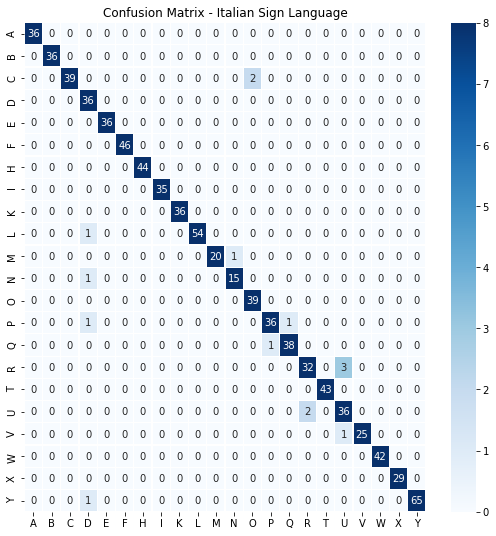

In [108]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.set_title("Confusion Matrix - Italian Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     ax=ax
                    )
maping

In [109]:
maping.figure.savefig("output.png")